    Predicing NFL Receiving Yards - Matt Funk - DSCI 470
    
    Can I predict NFL receiving yards for this season using NextGenStats route running metrics? God damn right I can. This seems like a question that could be answered with machine learning. But how? Since receiving yards are recorded as a discrete statistic, meaning there are only whole numbers, this kind of problem would typically fall under the classification umbrella of supervised machine learning. In this paper I will discuss the collection and cleaning of my data, I will also analyze the effectiveness of a categorical classifier when applied to a problem like this. Once I choose a classification or regression model, I will tune the parameters to best predict the receiving yards for the data I have collected on the 2016-2021 seasons. I will then input the recieving stats for this season and discuss the potential effectiveness of the model.
    
    Predicting the outcomes of all kinds of sports has become an immeasurably valuable business practice for sportsbooks, casinos, gamblers, as well as sports analysts, coaches, scouts, and many more proffessions. The method of predicting used to set lines for sports books is much more in depth and tuned to produce shockingly accurate projections. They compile every imaginable statistic that can be recorded for each team throughout the season. They utilize mathematical models, machine learning algorithms that may even be similar to the one I am putting together. It is these statistical predictions combined with expert knowledge, projected preseason win totals, and power rankings that make the model so powerful.
    
    In researching my project idea, I found some similar projects using the same kind of features to predict receiving yards. Chase Stuart on "Footballguys.com" Calculated percentage of teams air yard, average target air yards, and paired them with last season's yards to predict the current season. Many projects have been created with the intention of predicting sports. Another one that I found was from Jim King on Towards Data Science. He was able to predict fantasy points using player statistics in a neural network. I think my model will be able to predict competent results for season receiving yards as some others have been able to so using similar data. Now onto just that, my data, where I got it from and what it all means.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

    The data I will be using throughout this paper was collected from the NextGenStats website. They have a wealth of (somewhat) accessible information on anything you could think to measure on the football field. The set I chose to analyze is the receiving statistics for NFL wide recievers and tight ends. 
    
    I was able to copy and paste the matrix of statistics from the 2016-2021 seasons into a text file. However, each element was on a new line. The method I thought of to get the data into a comma separated value format may have been a little extra work, Im quite certain I could have just used a "\n" delimeter as I figured out later in the project. Regardless, I created a c++ function, using scaled iterators in a nested for loop I was able to insert a comma after every value and place 14 (number of features) values on each line. This essentially just put the data back into the matrix format that I needed to read it in normally. The player names needed to be read and cleaned in a separate file.

In [2]:
rec_stats = pd.read_csv("rec_stats.csv")
with open('player_names.txt') as f:
    names = f.readlines()

rec_stats = rec_stats.drop(['Unnamed: 14'], axis = 1)

In [3]:
names

['Tyreek Hill\n',
 'Justin Jefferson\n',
 'Stefon Diggs\n',
 'Cooper Kupp\n',
 'Jaylen Waddle\n',
 'A.J. Brown\n',
 'Travis Kelce\n',
 'Davante Adams\n',
 'Mike Evans\n',
 'Terry McLaurin\n',
 "Ja'Marr Chase\n",
 'Tyler Lockett\n',
 'JuJu Smith-Schuster\n',
 'Christian Kirk\n',
 'Tee Higgins\n',
 'CeeDee Lamb\n',
 'Amari Cooper\n',
 'Michael Pittman\n',
 'Chris Olave\n',
 'Tyler Boyd\n',
 'Dallas Goedert\n',
 'Garrett Wilson\n',
 'DK Metcalf\n',
 'Mike Williams\n',
 'Mark Andrews\n',
 'Marquise Brown\n',
 'Brandon Aiyuk\n',
 'Courtland Sutton\n',
 'T.J. Hockenson\n',
 'Jakobi Meyers\n',
 'Curtis Samuel\n',
 'D.J. Moore\n',
 'Gabe Davis\n',
 'Jerry Jeudy\n',
 'DeVonta Smith\n',
 'Allen Lazard\n',
 'Adam Thielen\n',
 'David Njoku\n',
 'Donovan Peoples-Jones\n',
 'Darnell Mooney\n',
 'Chris Godwin\n',
 'Amon-Ra St. Brown\n',
 'Mack Hollins\n',
 'Alec Pierce\n',
 'Zach Ertz\n',
 'Deebo Samuel\n',
 'Marquez Valdes-Scantling\n',
 'Diontae Johnson\n',
 'Drake London\n',
 'Pat Freiermuth\n',
 

In [4]:
names = list(map(lambda s: s.strip(), names))

stats = rec_stats.assign(player_name = names)

In [5]:
fantasy = pd.read_csv("rec_fantasy.tsv", sep="\t")

In [6]:
fantasy

,rank,player_name,team,points,gp,avg_points
0,1,Tyreek Hill,MIA,130.9,9,14.5
1,2,Stefon Diggs,BUF,127.7,8,16.0
2,3,Cooper Kupp,LAR,126.5,8,15.8
3,4,Jaylen Waddle,MIA,116.9,9,13.0
4,5,Justin Jefferson,MIN,114.9,8,14.4
...,...,...,...,...,...,...
485,131,Brandin Bryant,BUF,0.0,2,0.0
486,131,Kenjon Barner,FA,0.0,1,0.0
487,131,Marlon Mack,SF,0.0,2,0.0
488,131,Jermar Jefferson,DET,0.0,1,0.0


In [7]:
stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,TD,YAC/R,xYAC/R,+/-,player_name
0,MIA,WR,6.7,3.7,11.6,41.27,76,100,76.00,1104,3,4.9,4.3,0.6,Tyreek Hill
1,MIN,WR,6.0,3.6,9.5,41.91,59,84,70.24,867,3,6.4,5.5,1.0,Justin Jefferson
2,BUF,WR,5.4,2.9,11.9,38.52,60,83,72.29,857,7,4.7,3.5,1.2,Stefon Diggs
3,LAR,WR,6.5,3.3,7.5,39.43,72,93,77.42,813,6,5.8,4.4,1.4,Cooper Kupp
4,MIA,WR,6.2,3.2,11.2,27.83,47,70,67.14,812,6,6.8,4.7,2.1,Jaylen Waddle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,DAL,WR,6.2,2.4,12.2,14.42,12,23,52.17,135,1,2.4,3.1,-0.7,Michael Gallup
115,NO,WR,6.5,2.2,12.1,11.24,12,24,50.00,128,1,2.6,2.6,0.0,Marquez Callaway
116,CAR,WR,6.4,3.3,9.2,11.40,9,23,39.13,125,0,6.6,5.6,1.0,Shi Smith
117,WAS,TE,5.3,3.1,8.5,7.85,13,23,56.52,106,1,3.1,2.7,0.4,Logan Thomas


In [8]:
df_new = fantasy.iloc[np.where(fantasy.player_name.isin(names))]

In [9]:
df_new

,rank,player_name,team,points,gp,avg_points
0,1,Tyreek Hill,MIA,130.9,9,14.5
1,2,Stefon Diggs,BUF,127.7,8,16.0
2,3,Cooper Kupp,LAR,126.5,8,15.8
3,4,Jaylen Waddle,MIA,116.9,9,13.0
4,5,Justin Jefferson,MIN,114.9,8,14.4
...,...,...,...,...,...,...
254,38,Dalton Schultz,DAL,18.3,6,3.1
255,39,Kylen Granson,IND,17.6,9,2.0
256,40,Logan Thomas,WAS,16.6,5,3.3
258,42,Foster Moreau,LV,15.7,5,3.1


In [10]:
stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,TD,YAC/R,xYAC/R,+/-,player_name
0,MIA,WR,6.7,3.7,11.6,41.27,76,100,76.00,1104,3,4.9,4.3,0.6,Tyreek Hill
1,MIN,WR,6.0,3.6,9.5,41.91,59,84,70.24,867,3,6.4,5.5,1.0,Justin Jefferson
2,BUF,WR,5.4,2.9,11.9,38.52,60,83,72.29,857,7,4.7,3.5,1.2,Stefon Diggs
3,LAR,WR,6.5,3.3,7.5,39.43,72,93,77.42,813,6,5.8,4.4,1.4,Cooper Kupp
4,MIA,WR,6.2,3.2,11.2,27.83,47,70,67.14,812,6,6.8,4.7,2.1,Jaylen Waddle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,DAL,WR,6.2,2.4,12.2,14.42,12,23,52.17,135,1,2.4,3.1,-0.7,Michael Gallup
115,NO,WR,6.5,2.2,12.1,11.24,12,24,50.00,128,1,2.6,2.6,0.0,Marquez Callaway
116,CAR,WR,6.4,3.3,9.2,11.40,9,23,39.13,125,0,6.6,5.6,1.0,Shi Smith
117,WAS,TE,5.3,3.1,8.5,7.85,13,23,56.52,106,1,3.1,2.7,0.4,Logan Thomas


In [11]:
all_stats = stats.merge(fantasy)

    Up to this point has been all data retrieval and cleaning. I will now go through this process step by step and explain the meaning behind each of the features included in this set. 
    
    I started with 3 files, the first containing the recieving statistics, another containing the names of the players in the first dataset (in the same order). The last data set is a collection of fantasy football stats. This is not as important as the other data, and was retrieved when I didn't really know where this project was going. However, the "avg_points" column we got from it will be used for visualization purposes.
    
    After removing the "\n" from each of the names in the list, I was able to insert it as a column to the statistics dataframe. As for the fantasy dataframe, I needed to isolate the players that were also in the original. I was able to do this using iloc, but still lost 10 players in the conversion. I added as many fantasy football players as I could find, so I am forced to assume that there were spelling discrepancies in the two dataframes. This must be the reason for the data loss.
    
    After creating a new dataframe with a shared feature, I was able to merge the two and attain my final cleaned dataframe for prediction once the model is fit. To create the model, I wanted to visualize the route running metrics and their correlation with avg_points, which I am using as a general measure of a players' production on the field. These are my findings. Now is also probably a good time to explain what these variables are representing. I will give the NextGenStats definition of each feature as well as my own interpretation.

count    109.000000
mean       6.193578
std        0.801073
min        3.400000
25%        5.700000
50%        6.300000
75%        6.800000
max        7.900000
Name: CUSH, dtype: float64


Text(0, 0.5, 'Avg Fantasy Points')

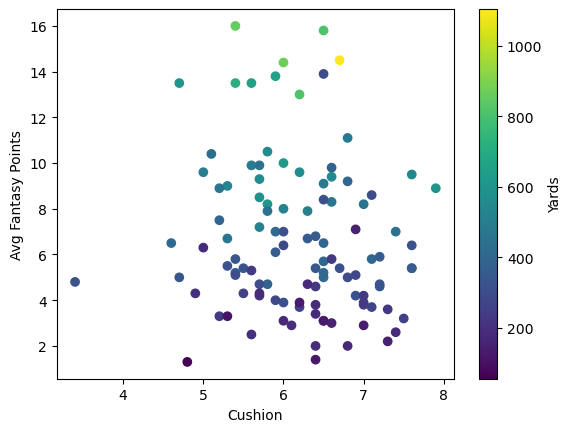

In [12]:
print(all_stats['CUSH'].describe())
plt.scatter(all_stats['CUSH'], all_stats['avg_points'], c = all_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Cushion')
plt.ylabel('Avg Fantasy Points')

CUSH = The distance (in yards) measured between a WR/TE and the defender they’re lined up against at the time of snap on all targets

    This metric measures the distance a defender puts between himself and the offensive player before the play starts. It can be thought of as the handicap that the defender thinks he needs to be able to effectively cover a reciever. If a player has a high average cushion, it should indicate that he might be a deep threat, or a player who has the ability to simply run past the defense, which seems like it should be a very valuable statistic for predicting recieving yards. However, the above plot shows a loose correlation with avg_fantasy points.

count    109.000000
mean       3.053211
std        0.558697
min        1.500000
25%        2.700000
50%        3.000000
75%        3.400000
max        4.500000
Name: SEP, dtype: float64


Text(0, 0.5, 'Avg Fantasy Points')

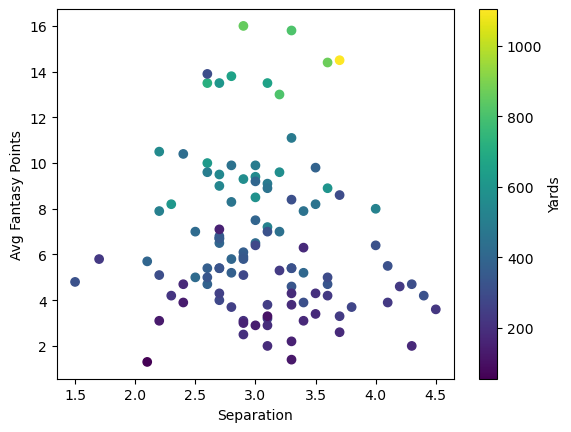

In [13]:
print(all_stats['SEP'].describe())
plt.scatter(all_stats['SEP'], all_stats['avg_points'], c = all_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Separation')
plt.ylabel('Avg Fantasy Points')

SEP = The distance (in yards) measured between a WR/TE and the nearest defender at the time of catch or incompletion.
    
    Separation represents a players' ability to get away from the defender that is covering him. My original thought was that a high value in this column should indicate a good reciever. This is because separation tells me how open they are getting, and the more open a reciever is, the more targets and pontential yardage they will get. However, the above graph shows almost no corellation between separation and fantasy points. This was very surprising to me. Perhaps it will have better success predicting yards in the model.

count    109.000000
mean       9.476147
std        3.078116
min        3.000000
25%        7.100000
50%        9.400000
75%       11.800000
max       16.900000
Name: TAY, dtype: float64


Text(0, 0.5, 'Avg Fantasy Points')

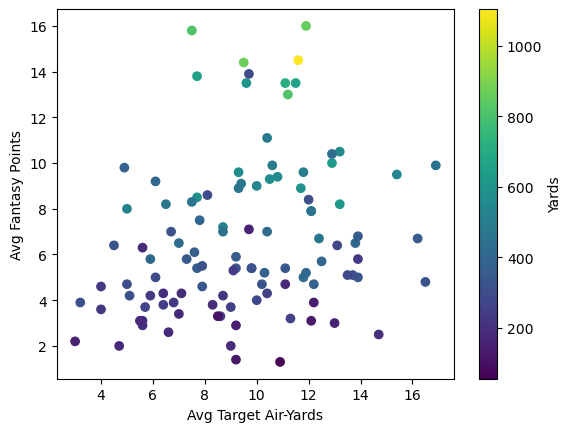

In [14]:
print(all_stats['TAY'].describe())
plt.scatter(all_stats['TAY'], all_stats['avg_points'], c = all_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Avg Target Air-Yards')
plt.ylabel('Avg Fantasy Points')

TAY = The average passing air yards per target for the receiver, by measuring the yards downfield at the time of all passing attempts that the receiver is the target. This stat indicates how far down the field they are being targeted on average.

    The NextGenStats definition was pretty comprehensive so I wont go into too much depth here. This metric should go hand in hand with average cushion in indicating a deep threat reciever. It is literally the average depth of a recievers targets. It showed a slight positive correlation with average fantasy points which is a good sign it will predict yards well.

count    109.000000
mean      20.509633
std       10.377064
min        3.670000
25%       11.570000
50%       18.780000
75%       27.570000
max       45.030000
Name: TAY%, dtype: float64


Text(0, 0.5, 'Avg Fantasy Points')

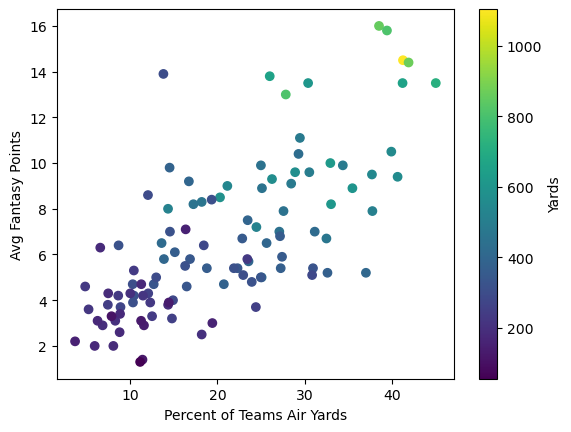

In [15]:
print(all_stats['TAY%'].describe())
plt.scatter(all_stats['TAY%'], all_stats['avg_points'], c = all_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Percent of Teams Air Yards')
plt.ylabel('Avg Fantasy Points')

TAY% = The sum of the receivers total intended air yards (all attempts) over the sum of his team’s total intended air yards. Represented as a percentage, this statistic represents how much of a team’s deep yards does the player account for.

    Again, pretty comprehensive, thanks NextGen. Definitely some solid correlation going on, especially compared to what we've seen with the last few. I should probably be doing these graphs with yards and maybe even with the data set that I'm about to read in, but I've already started and I had nothing else to do with the fantasy data that I so eloqently formatted and merged, so here we are. This is a measure of both how deep a players targets are, as well as how often they're being targeted. This is the only statistic in the model that is influenced by target volume. It will almost certainly be the most important feature in the model.

count    109.000000
mean      65.796697
std        9.318233
min       39.130000
25%       60.380000
50%       66.000000
75%       72.000000
max       92.310000
Name: CTCH%, dtype: float64


Text(0, 0.5, 'Avg Fantasy Points')

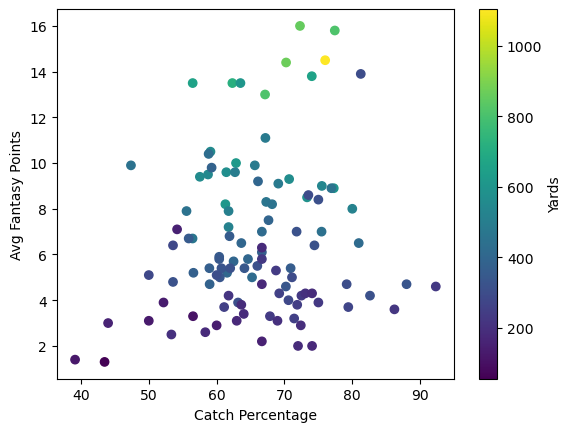

In [16]:
print(all_stats['CTCH%'].describe())
plt.scatter(all_stats['CTCH%'], all_stats['avg_points'], c = all_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Catch Percentage')
plt.ylabel('Avg Fantasy Points')

CTCH% = They didn't have a definition for this one because it's pretty self explanatory.

    This is a players' catch percentage. It is the number of receptions divided by the number of targets, represented as a percent. Due to their lack of elaboration, I'm not sure if this perentage is based on catchable balls, or targets within the catch radius of a receiver. If a receiver is dropping catchable balls, that is literally the worst thing for yardage or fantasy points or any measure of production that you would want to predict. This is somewhat reflected in the plot against fantasy points as there is a slight positive correlation.

count    109.000000
mean       0.524771
std        1.069887
min       -1.400000
25%       -0.200000
50%        0.400000
75%        1.000000
max        3.800000
Name: +/-, dtype: float64


Text(0, 0.5, 'Avg Fantasy Points')

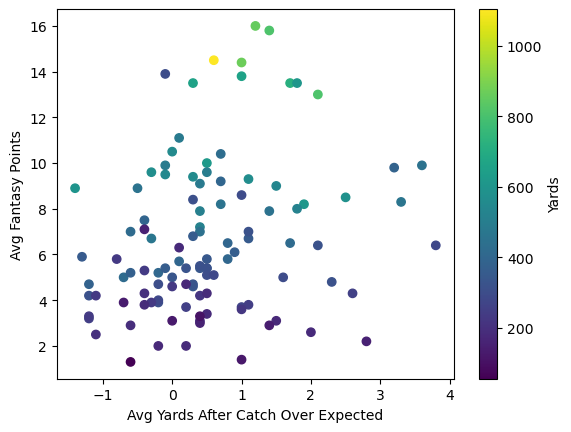

In [17]:
print(all_stats['+/-'].describe())
plt.scatter(all_stats['+/-'], all_stats['avg_points'], c = all_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Avg Yards After Catch Over Expected')
plt.ylabel('Avg Fantasy Points')

+/- = A receiver’s YAC compared to their Expected YAC.

    Surprisingly, this definition is pretty bad, I guess the guy got bored and gave up after the first few. This metric is the difference in the players' yards after catch per reception, and their expected yards after catch per reception. Essentially representing a receiver's ability to make a play and break a tackle after they have made the reception. The graph shows a very loose correlation in the lower values of +/- and proceeds to fan out into nothing. I still think this will be a good predictor for yards despite the poor correlation.

<AxesSubplot:>

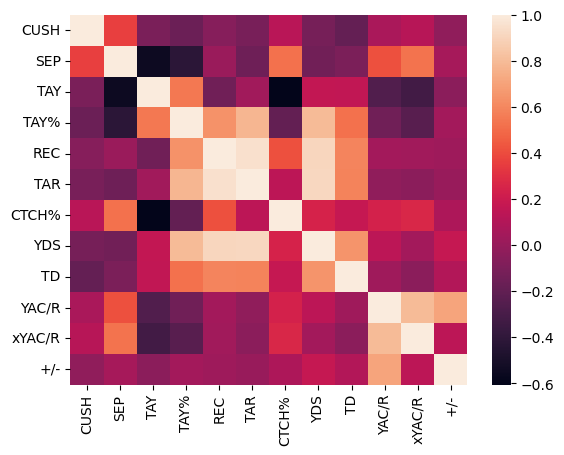

In [18]:
new_stats = pd.read_csv("new_stats.csv")

new_stats = new_stats.drop(["Unnamed: 14"], axis = 1)

sn.heatmap(new_stats.corr())

    I have now read in the 2016-2021 data that I will be using to fit the model. I created a heatmap of the features of the dataframe to see if the trends were present in this one. However, I was not able to get the fantasy data for these seasons due to the volume of players and the duplicate names. 
    
    We can see that TAY, TAY%, CTCH%, and +/- have pretty good positive correlations with yards and touchdowns (which fantasy points are essentially a measure of). CUSH and SEP seem to be correlated with eachother. Another interesting thing that I noticed is that TAY has quite strong negative correlations with SEP and CTCH%. I visualized this trend below.

Text(0, 0.5, 'Separation')

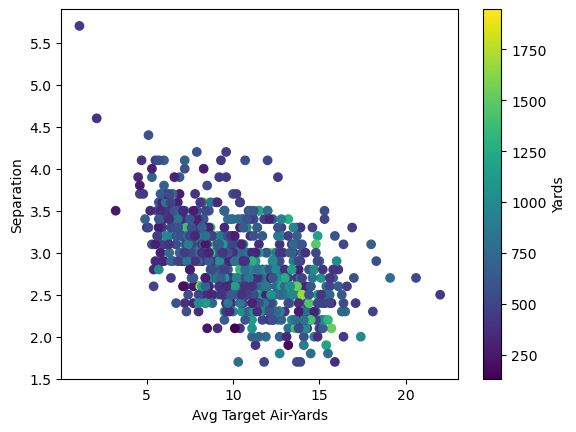

In [19]:
plt.scatter(new_stats['TAY'], new_stats['SEP'], c = new_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Avg Target Air-Yards')
plt.ylabel('Separation')

Text(0, 0.5, 'Catch Percentage')

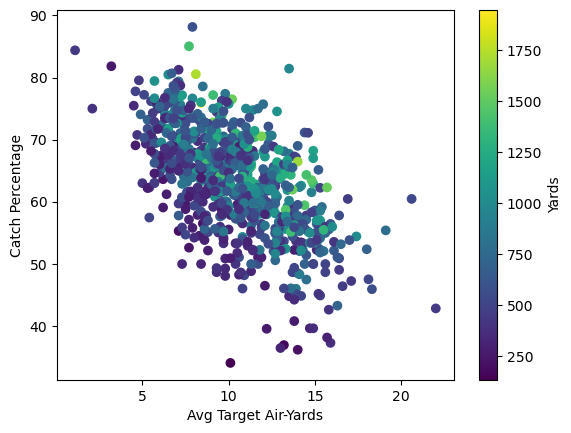

In [20]:
plt.scatter(new_stats['TAY'], new_stats['CTCH%'], c = new_stats['YDS'])
plt.colorbar(label = 'Yards')
plt.xlabel('Avg Target Air-Yards')
plt.ylabel('Catch Percentage')

In [21]:
new_stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,TD,YAC/R,xYAC/R,+/-
0,NFC,WR,6.5,3.6,8.4,31.32,145,191,75.92,1947,16,6.2,4.8,1.3
1,NFC,WR,5.7,3.0,12.3,45.27,108,167,64.67,1616,10,4.7,4.0,0.8
2,NFC,WR,5.3,2.9,9.1,35.27,123,169,72.78,1553,11,5.4,4.8,0.6
3,AFC,WR,5.0,2.3,12.7,37.38,81,128,63.28,1455,13,8.3,3.9,4.4
4,NFC,WR,6.7,3.3,8.7,26.61,77,121,63.64,1397,6,10.4,5.2,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,JAX,TE,5.9,2.8,7.5,7.00,30,51,58.82,281,4,3.4,5.0,-1.6
761,KC,WR,7.2,3.5,7.7,10.08,31,51,60.78,279,2,5.2,5.2,0.0
762,GB,TE,7.6,2.7,8.4,6.88,30,47,63.83,271,2,3.3,3.3,0.1
763,CAR,WR,6.2,3.2,10.1,8.80,27,53,50.94,271,1,4.3,5.1,-0.9


In [22]:
X_stats = new_stats[['CUSH','SEP','TAY','TAY%', 'CTCH%', '+/-']]

y_stats = new_stats['YDS']

X_train, X_test, y_train, y_test = train_test_split(X_stats, y_stats, random_state = 12)

    TIME TO START MACHINE LEARNING!!!!!!!!!!!!
    Above, I have isolated the predicting metrics into their own matrix and placed the yards in a series. Then I separated them into training and testing sets for model selection. Below, I have imported the k-nearest neighbors classifier and regressor to compare.

In [23]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC
knn = KNeighborsClassifier(n_neighbors = 3)

In [24]:
knn.fit(X_train, y_train)
knn.predict(X_test)

/Users/funkyice/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([ 365,  729,  316,  286,  433, 1165,  372,  618,  634,  272,  417,
        377,  925,  941,  310,  744,  775,  802,  734,  438,  387,  900,
        321, 1053,  692,  576,  860,  677,  243,  545,  273, 1038,  451,
        439,  560,  564, 1303,  854,  440,  799,  804,  216,  299,  575,
        831,  305,  294,  896,  503,  372,  575,  476,  447, 1093,  771,
        452,  434,  243,  505,  316,  941,  536,  243,  324,  510,  281,
        680,  357,  365,  726,  532,  941, 1118,  363,  397,  879,  403,
        408,  560,  413,  652,  854,  328, 1002,  941,  613,  363,  423,
        400, 1003,  372,  392,  467,  810,  748,  375,  810,  253,  734,
        391,  275,  793,  453,  438,  271,  302, 1118,  729,  383,  418,
        377,  418,  726,  891,  748,  482,  654,  363,  520,  569,  357,
        485,  504,  334,  726,  802,  269,  312,  299,  260,  583,  299,
        851, 1225,  503,  629,  816,  497,  452, 1091,  788,  919,  365,
        872,  243,  383, 1078,  396,  793,  552,  4

In [25]:
knn.score(X_test, y_test)

/Users/funkyice/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.005208333333333333

    I fit the classifier to the data... and it was awful. Just look at that score. The model was half a percent successful in predicting the yards of the test set. This was to be expected though, with so many classes to try and place these players into, it would have been extremely surprising if this model did any better. Time to try out some regression models.

In [26]:
reg = KNeighborsRegressor(n_neighbors=4)

In [27]:
reg.fit(X_train, y_train)
reg.predict(X_test)

array([ 417.75,  987.  ,  335.5 ,  294.75,  561.  , 1262.5 ,  410.75,
        704.75,  640.  ,  325.75,  430.25,  419.5 , 1105.5 , 1154.25,
        454.5 ,  986.5 ,  893.  ,  929.5 , 1015.75,  844.  ,  472.25,
       1020.5 ,  415.25, 1328.75,  775.75,  663.25,  841.75,  855.25,
        277.  ,  507.5 ,  322.25, 1142.25,  514.25,  513.75,  560.  ,
        646.5 , 1391.25, 1137.25,  472.  ,  928.75, 1016.5 ,  324.  ,
        392.  ,  682.25,  870.5 ,  333.  ,  462.25, 1155.  ,  632.25,
        449.75,  801.5 ,  591.75,  509.75, 1296.  ,  876.25,  612.75,
        464.5 ,  324.25,  513.75,  353.25, 1134.  ,  663.5 ,  343.75,
        357.  ,  515.25,  385.  ,  702.25,  459.75,  409.25,  866.75,
        667.  ,  987.  , 1199.5 ,  456.75,  475.  ,  911.5 ,  468.75,
        422.75,  583.5 ,  485.75,  826.  , 1035.5 ,  344.75, 1005.25,
       1030.75,  650.5 ,  404.  ,  494.75,  561.75, 1061.  ,  450.  ,
        416.5 ,  678.75,  938.75,  966.75,  501.75,  809.75,  394.  ,
        935.5 ,  561

In [28]:
reg.score(X_test, y_test)

0.8036281409327943

In [29]:
lr = LinearRegression().fit(X_train, y_train)

In [30]:
lr.score(X_test, y_test)

0.8146310900290652

    The regression models had much better success in predicting the test set yardage. Now I have baseline scores from models with their default parameters. It looks like the linear regressor was about a percent more successful, but this is only success in predicting the test set so we need to grid search to tune the parameters of each, and get more comprehensive results using the default stratified k fold cross-validator. I created dictionaries containing all of the parameters that I wanted to change, and ran them through the grid search for both models.

In [31]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'weights': ['uniform', 'distance'], 
          'algorithm': ['ball_tree', 'kd_tree', 'brute'],
          'leaf_size': [1,2,3,4, 5, 10, 15, 20, 30]}

In [32]:
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(KNeighborsRegressor(), params, cv=5,return_train_score=True)

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 10, 15, 20, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [34]:
grid_search.best_params_

{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}

In [35]:
grid_search.best_score_

0.7983476892542212

In [36]:
grid_search.score(X_test, y_test)

0.8077736333509269

In [37]:
import warnings
with warnings.catch_warnings(record=True):

    lr_params = {'fit_intercept': [True, False],
             'normalize': [True, False],
             'copy_X': [True, False]}
    lr_grid_search = GridSearchCV(LinearRegression(), lr_params, cv=5, return_train_score=True)
    lr_grid_search.fit(X_train, y_train)
    lr_grid_search.best_params_

In [38]:
lr_grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [39]:
lr_grid_search.best_score_

0.8109939478116825

In [40]:
lr_grid_search.score(X_test, y_test)

0.8146310900290652

    After assessing all of the combinations of parameters, the linear regression model was still more successful. It has a higher score in the grid search's own score calculation as well as predicting the test set. This is the model I will use to predict the current season's receiving yards. Below I will create a new dataframe containing the current season metrics and use it to predict the yardage for this season.

In [41]:
curr_szn = all_stats[['CUSH','SEP','TAY','TAY%', 'CTCH%', '+/-']]

In [42]:
all_stats['proj_yds'] = lr_grid_search.predict(curr_szn)

    Alright, moment of truth, lets see the real projected yards paired with the names of the players that we will watch for the remainder of the season. I inserted the predictions into the original dataframe and separated them into higher yardage and lower yardage dataframes. I set 900 as the bar and sorted the upper by yards, and the lower by index. I did this because I dont really care about the order in the lower half I just want to see which recievers the model thinks are going to fall off and stop preducing as many yards as they have been so far.

In [43]:
all_stats.index = np.arange(1, len(all_stats) + 1)
all_stats

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,...,YAC/R,xYAC/R,+/-,player_name,rank,team,points,gp,avg_points,proj_yds
1,MIA,WR,6.7,3.7,11.6,41.27,76,100,76.00,1104,...,4.9,4.3,0.6,Tyreek Hill,1,MIA,130.9,9,14.5,1519.917104
2,MIN,WR,6.0,3.6,9.5,41.91,59,84,70.24,867,...,6.4,5.5,1.0,Justin Jefferson,5,MIN,114.9,8,14.4,1509.528151
3,BUF,WR,5.4,2.9,11.9,38.52,60,83,72.29,857,...,4.7,3.5,1.2,Stefon Diggs,2,BUF,127.7,8,16.0,1405.878500
4,LAR,WR,6.5,3.3,7.5,39.43,72,93,77.42,813,...,5.8,4.4,1.4,Cooper Kupp,3,LAR,126.5,8,15.8,1555.007883
5,MIA,WR,6.2,3.2,11.2,27.83,47,70,67.14,812,...,6.8,4.7,2.1,Jaylen Waddle,4,MIA,116.9,9,13.0,1044.187103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,DAL,WR,6.2,2.4,12.2,14.42,12,23,52.17,135,...,2.4,3.1,-0.7,Michael Gallup,95,DAL,19.5,5,3.9,322.280385
106,NO,WR,6.5,2.2,12.1,11.24,12,24,50.00,128,...,2.6,2.6,0.0,Marquez Callaway,101,NO,18.8,6,3.1,220.993212
107,CAR,WR,6.4,3.3,9.2,11.40,9,23,39.13,125,...,6.6,5.6,1.0,Shi Smith,122,CAR,12.5,9,1.4,165.126862
108,WAS,TE,5.3,3.1,8.5,7.85,13,23,56.52,106,...,3.1,2.7,0.4,Logan Thomas,40,WAS,16.6,5,3.3,250.692099


In [44]:
highest_yds = all_stats.where(all_stats['proj_yds'] > 900)
lower_yds = all_stats.where(all_stats['proj_yds'] < 900)
highest_yds = highest_yds.dropna
lower_yds = lower_yds.dropna
highest_yds().sort_values('proj_yds', ascending = False)

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,...,YAC/R,xYAC/R,+/-,player_name,rank,team,points,gp,avg_points,proj_yds
4,LAR,WR,6.5,3.3,7.5,39.43,72.0,93.0,77.42,813.0,...,5.8,4.4,1.4,Cooper Kupp,3.0,LAR,126.5,8.0,15.8,1555.007883
1,MIA,WR,6.7,3.7,11.6,41.27,76.0,100.0,76.00,1104.0,...,4.9,4.3,0.6,Tyreek Hill,1.0,MIA,130.9,9.0,14.5,1519.917104
6,PHI,WR,5.4,2.6,11.1,45.03,43.0,69.0,62.32,718.0,...,6.7,5.0,1.7,A.J. Brown,6.0,PHI,107.8,8.0,13.5,1518.585475
2,MIN,WR,6.0,3.6,9.5,41.91,59.0,84.0,70.24,867.0,...,6.4,5.5,1.0,Justin Jefferson,5.0,MIN,114.9,8.0,14.4,1509.528151
3,BUF,WR,5.4,2.9,11.9,38.52,60.0,83.0,72.29,857.0,...,4.7,3.5,1.2,Stefon Diggs,2.0,BUF,127.7,8.0,16.0,1405.878500
12,SEA,WR,7.9,3.6,11.7,35.47,51.0,66.0,77.27,598.0,...,2.7,4.1,-1.4,Tyler Lockett,12.0,SEA,79.8,9.0,8.9,1276.405974
16,DAL,WR,6.6,3.0,10.8,40.65,42.0,73.0,57.53,556.0,...,5.0,4.7,0.3,CeeDee Lamb,14.0,DAL,74.8,8.0,9.4,1273.467419
8,LV,WR,5.6,3.1,11.5,41.22,48.0,85.0,56.47,658.0,...,5.1,4.8,0.3,Davante Adams,7.0,LV,107.7,8.0,13.5,1271.442434
17,CLE,WR,5.8,2.2,13.2,39.93,39.0,66.0,59.09,553.0,...,2.9,2.8,0.0,Amari Cooper,10.0,CLE,84.3,8.0,10.5,1230.588669
22,SEA,WR,6.3,2.2,12.1,37.76,42.0,68.0,61.76,510.0,...,3.0,2.5,0.4,DK Metcalf,20.0,SEA,71.0,9.0,7.9,1220.989485


In [45]:
lower_yds().sort_index()

,TEAM,POS,CUSH,SEP,TAY,TAY%,REC,TAR,CTCH%,YDS,...,YAC/R,xYAC/R,+/-,player_name,rank,team,points,gp,avg_points,proj_yds
20,PHI,TE,6.0,4.0,5.0,14.33,40.0,50.0,80.00,521.0,...,8.9,7.1,1.8,Dallas Goedert,6.0,PHI,64.1,8.0,8.0,833.692471
21,NYJ,WR,5.7,3.1,8.7,24.46,42.0,68.0,61.76,521.0,...,5.0,4.6,0.4,Garrett Wilson,31.0,NYJ,64.6,9.0,7.2,839.372483
28,MIN,TE,6.6,2.8,7.5,18.19,35.0,52.0,67.31,465.0,...,6.9,3.6,3.3,T.J. Hockenson,5.0,Multi,66.5,8.0,8.3,825.726294
30,WAS,WR,7.0,3.5,6.5,17.24,45.0,66.0,68.18,455.0,...,4.4,3.7,0.7,Curtis Samuel,17.0,WAS,73.7,9.0,8.2,723.887872
31,BUF,WR,5.7,2.8,16.9,24.98,18.0,38.0,47.37,451.0,...,7.2,3.7,3.6,Gabe Davis,21.0,BUF,69.1,7.0,9.9,701.619147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,DAL,WR,6.2,2.4,12.2,14.42,12.0,23.0,52.17,135.0,...,2.4,3.1,-0.7,Michael Gallup,95.0,DAL,19.5,5.0,3.9,322.280385
106,NO,WR,6.5,2.2,12.1,11.24,12.0,24.0,50.00,128.0,...,2.6,2.6,0.0,Marquez Callaway,101.0,NO,18.8,6.0,3.1,220.993212
107,CAR,WR,6.4,3.3,9.2,11.40,9.0,23.0,39.13,125.0,...,6.6,5.6,1.0,Shi Smith,122.0,CAR,12.5,9.0,1.4,165.126862
108,WAS,TE,5.3,3.1,8.5,7.85,13.0,23.0,56.52,106.0,...,3.1,2.7,0.4,Logan Thomas,40.0,WAS,16.6,5.0,3.3,250.692099


    The model worked well in my opinion. A lot of good names coming up to the higher yards section. Plenty of good receivers that started out the season slow rising to the top. Tyler Lockett and Ceedee Lamb jumping up from 12 and 16 to 6 and 7 was cool to see, look for them to pick it up in the back half of the season. Cooper Kupp is the projected yards leader, which there is a very good chance of as he lead the NFL in receptions, yards, and touchdowns last season (only 4 players have ever done this). 
    
    Some curious drops in position took place. Jaylen Waddle coming down from 5 all the way to down 21. Travis Kelce and Mike Evans took a dive as well. Some tendencies I'm seeing with the players dropping in position are a lower percentage of teams air yards. We knew this would be an important metric in predicting yards. Jaylen Waddle is a great reciever still performing very well this season. However, Tyreek Hill is on the same team and is the current yards leader as well as the number 2 projected from the model. This is eating away at Waddle's TAY% as Tyreek continues to skyrocket. Catch percentage seems to be important to predicting, but not too important as Philadelphia's Dallas Goedert has one of the highest CTCH% but still fell short of the higher yards category.
    
    In conclusion, I think the metrics offered on the NextGenStats website did a great job in predicting receiving yards for the season. I think most of my assumptions about the importance of features were correct. And I think I did a great job with this paper. So thanks for reading and if you're a betting man/woman go ahead and feel free to use this information to the best of your abilities.

In [46]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(all_stats[['player_name', 'proj_yds']].sort_values('proj_yds', ascending = False))

,player_name,proj_yds
4,Cooper Kupp,1555.008
1,Tyreek Hill,1519.917
6,A.J. Brown,1518.585
2,Justin Jefferson,1509.528
3,Stefon Diggs,1405.879
12,Tyler Lockett,1276.406
16,CeeDee Lamb,1273.467
8,Davante Adams,1271.442
17,Amari Cooper,1230.589
22,DK Metcalf,1220.989


Appelbaum, J. (2021, December 9). How do betting lines work?: The Action Network. Action Network. Retrieved November 21, 2022, from https://www.actionnetwork.com/education/how-do-betting-lines-work-vegas 

Stuart, C., &amp; Stuart, C. (2013, June 14). How to project receiving yards. Footballguys.com. Retrieved November 21, 2022, from https://www.footballguys.com/article/stuart_projecting_receiving_yards?article=stuart_projecting_receiving_yards 

Using machine learning to predict fantasy football points. (n.d.). Retrieved November 21, 2022, from https://towardsdatascience.com/using-machine-learning-to-predict-fantasy-football-points-72f77cb0678a 

Ngs: NFL next gen stats. Next Gen Stats. (n.d.). Retrieved November 21, 2022, from https://nextgenstats.nfl.com/stats/receiving#yards 